In [86]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df = pd.read_csv('cleaned_data.csv')
df.head(2)
# df[df['Fraud']==1].shape[0]

,Income,Post-code,Employed,Home Owner,Education,Gender,Balance,Age,Colour,Fraud
0,10500,16,0,0,1,0,300.0,25.0,5,0
1,26525,39,1,0,0,1,3500.0,25.0,1,0


In [87]:
#Income, Employed, Home Owner, Balance, Colour is over 30% related with Fraud
# X_features = df.drop(['Fraud','Post-code','Education','Gender','Age'], axis=1, inplace=False)
X_features = df.drop(['Fraud'], axis=1)
y_targets = df['Fraud']
X_train, X_test, y_train, y_test=train_test_split(X_features, y_targets, \
                                                  test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96, 9) (24, 9) (96,) (24,)


In [88]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression(solver='liblinear')
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

decision_tree.fit(X_train,y_train)
decision_tree_predict = decision_tree.predict(X_test)
decision_tree_accuracy_score = accuracy_score(y_test, decision_tree_predict)
decision_tree_cross_val_score = cross_val_score(estimator=decision_tree, X=X_features, y=y_targets, scoring="accuracy", cv=10)
decision_tree_report = classification_report(y_test, decision_tree_predict)
print('Decission Tree Accuracy: {0:.4f}'.format(decision_tree_accuracy_score))
print('Decission Tree CROSS VLIDATION SCORE: {0}'.format(decision_tree_cross_val_score))
print('Decission Tree REPORT: {0}'.format(decision_tree_report))
print("\n")

random_forest.fit(X_train,y_train)
random_forest_predict = random_forest.predict(X_test)
random_forest_accuracy_score = accuracy_score(y_test, random_forest_predict)
random_forest_cross_val_score = cross_val_score(estimator=random_forest, X=X_features, y=y_targets, scoring="accuracy", cv=10)
random_forest_report = classification_report(y_test, random_forest_predict)
print('Random Forest Accuracy: {0:.4f}'.format(random_forest_accuracy_score))
print('Random Forest CROSS VLIDATION SCORE: {0}'.format(random_forest_cross_val_score))
print('Random Forest REPORT: {0}'.format(random_forest_report))
print("\n")

logistic_regression.fit(X_train,y_train)
logistic_regression_predict = logistic_regression.predict(X_test)
logistic_regression_accuracy_score = accuracy_score(y_test, logistic_regression_predict)
logistic_regression_cross_val_score = cross_val_score(estimator=logistic_regression, X=X_features, y=y_targets, scoring="accuracy", cv=10)
logistic_regression_report = classification_report(y_test, logistic_regression_predict)
print('Logistic Regression Accuracy: {0:.4f}'.format(logistic_regression_accuracy_score))
print('Logistic Regression CROSS VLIDATION SCORE: {0}'.format(logistic_regression_cross_val_score))
print('Logistic Regression REPORT: {0}'.format(logistic_regression_report))
print("\n")

knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)
knn_accuracy_score = accuracy_score(y_test, knn_predict)
knn_cross_val_score = cross_val_score(estimator=knn, X=X_features, y=y_targets, scoring="accuracy", cv=10)
knn_report = classification_report(y_test, knn_predict)
print('KNN Accuracy: {0:.4f}'.format(knn_accuracy_score))
print('KNN CROSS VLIDATION SCORE: {0}'.format(knn_cross_val_score))
print('KNN REPORT: {0}'.format(knn_report))
print("\n")


Decission Tree Accuracy: 0.8750
Decission Tree CROSS VLIDATION SCORE: [0.83333333 0.83333333 0.91666667 0.83333333 0.91666667 1.
 0.91666667 1.         1.         0.83333333]
Decission Tree REPORT:               precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.77      0.87        13

    accuracy                           0.88        24
   macro avg       0.89      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24



Random Forest Accuracy: 1.0000
Random Forest CROSS VLIDATION SCORE: [0.75       0.91666667 1.         1.         1.         1.
 1.         1.         1.         0.91666667]
Random Forest REPORT:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weight

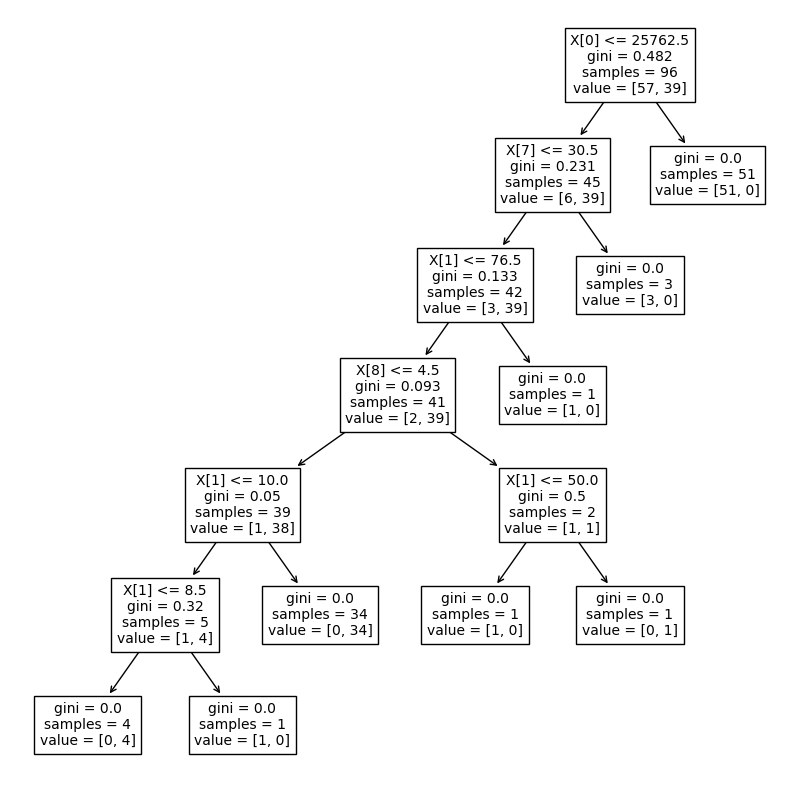

In [89]:
#Plot the decision tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(decision_tree, fontsize=10)
plt.show()

Feature importances:
[0.775 0.102 0.    0.    0.    0.    0.    0.104 0.018]
Income :  0.775
Post-code :  0.102
Employed :  0.000
Home Owner :  0.000
Education :  0.000
Gender :  0.000
Balance :  0.000
Age :  0.104
Colour :  0.018


<AxesSubplot:>

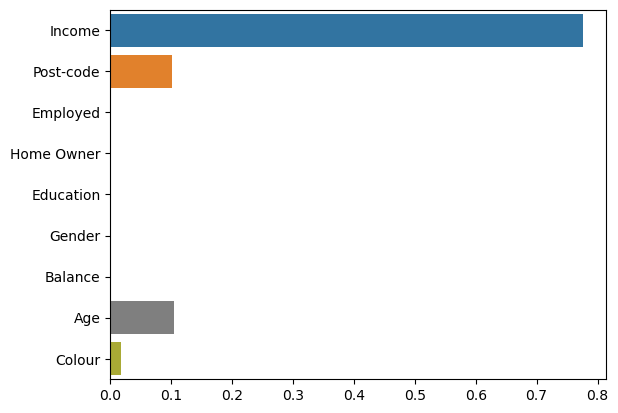

In [90]:
#feature inportance
print("Feature importances:\n{0}".format(np.round(decision_tree.feature_importances_,3)))
for name,value in zip(X_features.columns, decision_tree.feature_importances_):
    print("{0} : {1: .3f}".format(name, value))
sns.barplot(x=decision_tree.feature_importances_, y=X_features.columns)

In [91]:


# cross-validation 
# hyperparameters 
# scaling" and "de-noising
# improve system accuracy performance
# ROC curves and confusion matrices
# find correlated dimensions
# measure and analyse features and target dependencies 
# •	Analyse the data distribution
# •	For supervised learning analyse how the target variable is influenced by the features
# •	Analyse the difficulty of your prediction task


<AxesSubplot:xlabel='Post-code', ylabel='Education'>

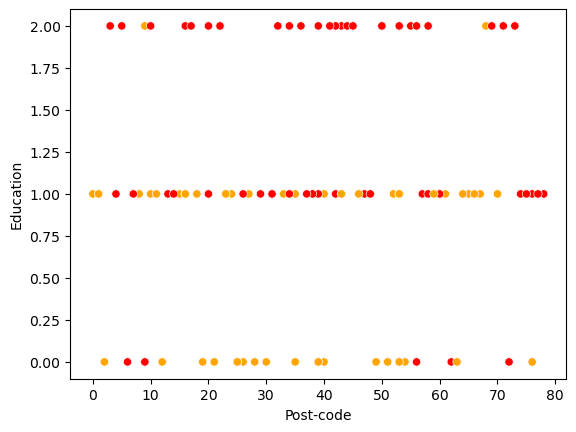

In [92]:
sns.scatterplot(x="Post-code", y="Education", hue='Fraud', markers=["c", "a"], palette=['red', 'orange'], data=df, legend=False)